In [17]:
import pandas as pd
import glob
import os


def read_csv_file(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The DataFrame containing the CSV data.
    """
    try:
        df = pd.read_csv(file_path,skiprows=3)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

In [18]:
# Get list of solar files
solar_files = glob.glob('solar_202*.csv')
print("Found files:", solar_files)

# Read and combine all files
dfs = []
for file in solar_files:
    df = read_csv_file(file)  # Skip the first row if it contains headers
    if df is not None:
        dfs.append(df)
        print(f"Added {file} with shape {df.shape}")

# Combine all DataFrames
if dfs:
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    print(f"\nCombined DataFrame shape: {combined_df.shape}")
    print("\nFirst few rows:")
    print(combined_df.head())
else:
    print("No valid DataFrames to combine")

# Make electicity from kWH to MWh 
combined_df['electricity'] = combined_df['electricity'] / 1000.0
combined_df.to_csv('combined_solar_data.csv', index=False)
print("Combined data saved to 'combined_solar_data.csv'")

Found files: ['solar_2020.csv', 'solar_2021.csv', 'solar_2022.csv', 'solar_2023.csv', 'solar_2024.csv']
Added solar_2020.csv with shape (8784, 3)
Added solar_2021.csv with shape (8760, 3)
Added solar_2022.csv with shape (8760, 3)
Added solar_2023.csv with shape (8760, 3)
Added solar_2024.csv with shape (8784, 3)

Combined DataFrame shape: (43848, 3)

First few rows:
               time        local_time  electricity
0  2020-01-01 00:00  2020-01-01 01:00          0.0
1  2020-01-01 01:00  2020-01-01 02:00          0.0
2  2020-01-01 02:00  2020-01-01 03:00          0.0
3  2020-01-01 03:00  2020-01-01 04:00          0.0
4  2020-01-01 04:00  2020-01-01 05:00          0.0
Combined data saved to 'combined_solar_data.csv'


# Check Which Distributions fits Production Best (Hourly)

[04-06-2025 14:43:35] [distfit.distfit] [INFO] fit
[04-06-2025 14:43:35] [distfit.distfit] [INFO] transform
[04-06-2025 14:43:35] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 0.292121] [loc=12.513 scale=20.363]
[04-06-2025 14:43:35] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 0.243847] [loc=0.000 scale=12.513]
[04-06-2025 14:43:36] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 0.243847] [loc=-1073741824.000 scale=1073741824.000]
[04-06-2025 14:43:36] [distfit.distfit] [INFO] [dweibull  ] [0.63 sec] [RSS: 0.258496] [loc=0.000 scale=14.237]
[04-06-2025 14:43:38] [distfit.distfit] [INFO] [t         ] [1.54 sec] [RSS: 0.310484] [loc=-0.000 scale=0.000]
[04-06-2025 14:43:39] [distfit.distfit] [INFO] [genextreme] [0.81 sec] [RSS: 0.310503] [loc=0.000 scale=0.000]
[04-06-2025 14:43:39] [distfit.distfit] [INFO] [gamma     ] [0.29 sec] [RSS: 0.154447] [loc=-0.000 scale=18.863]
[04-06-2025 14:43:39] [distfit.distfit] [INFO] [lognorm   ] [0.69 sec] [RSS: 0.308983] [l

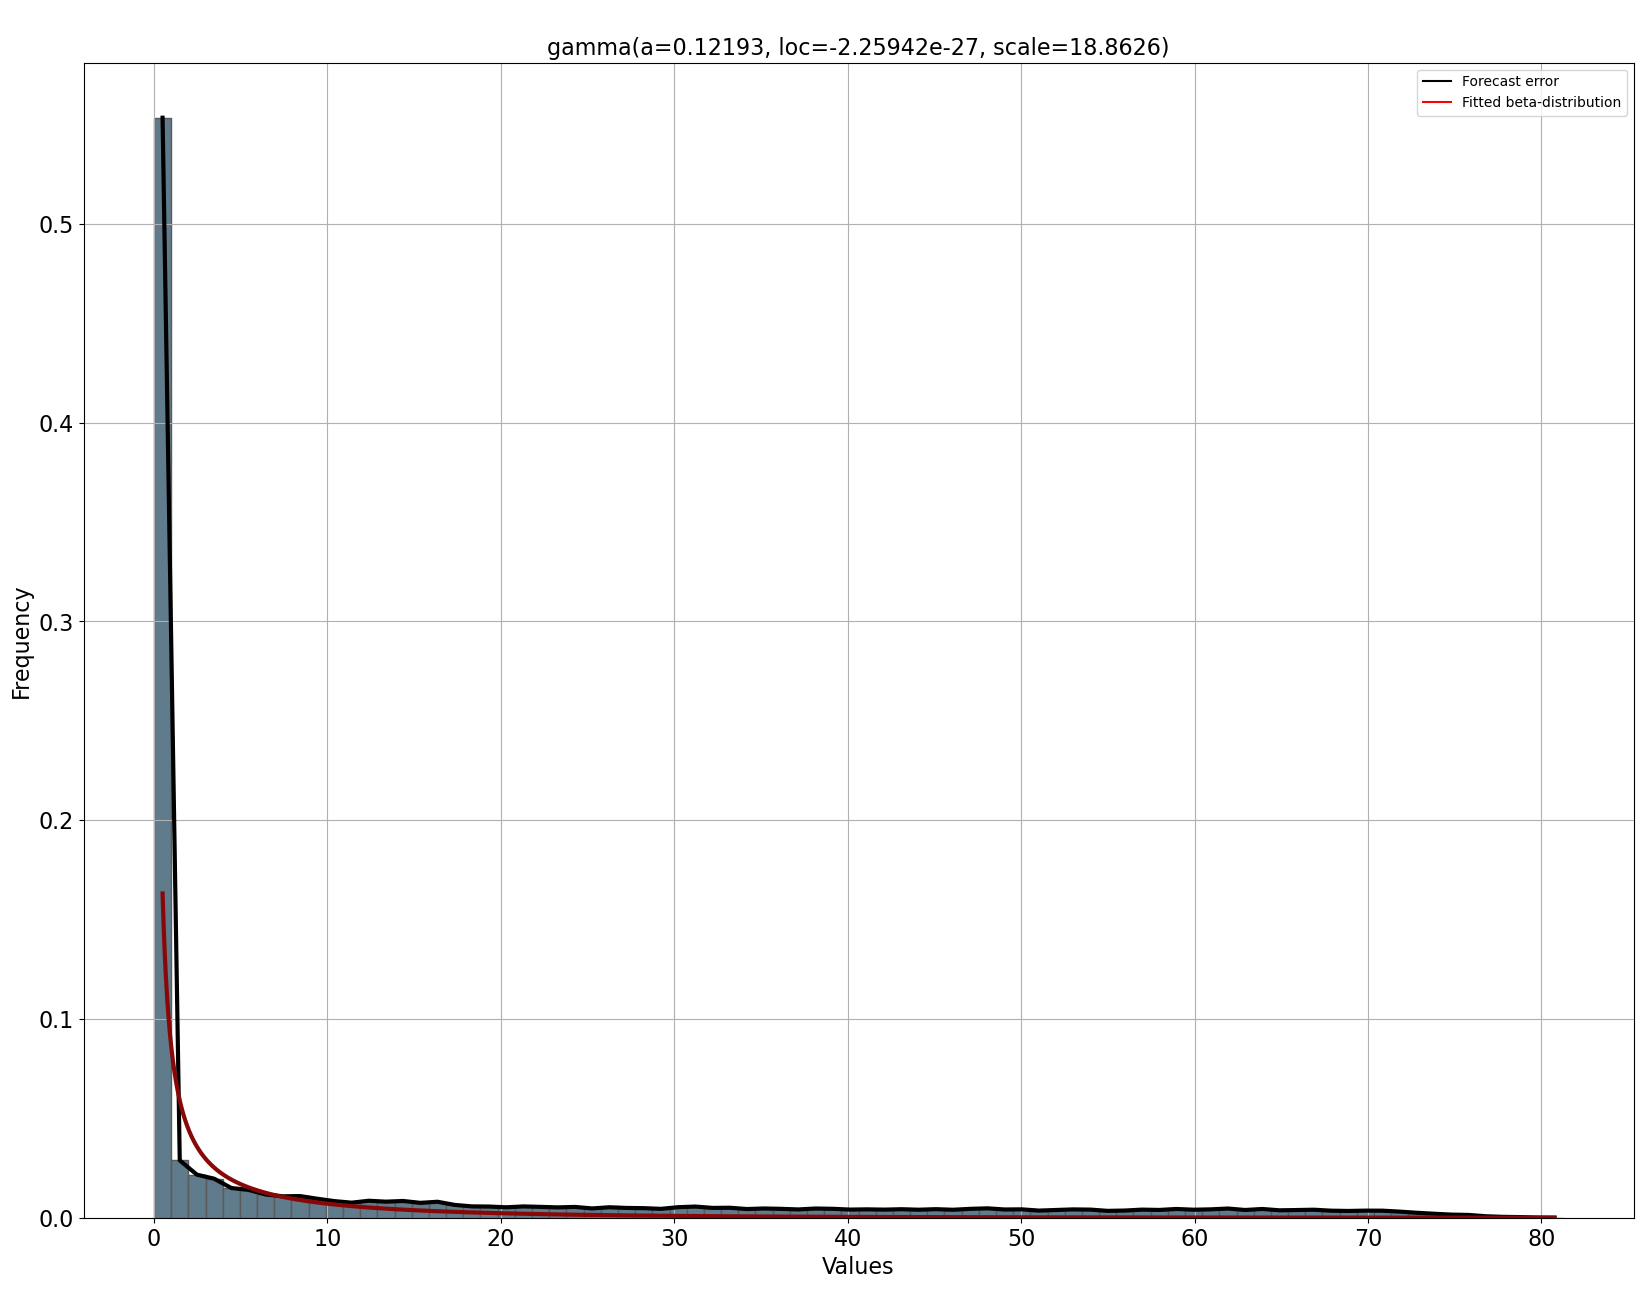

In [19]:
from distfit import distfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(combined_df['electricity'])
fig, ax = dist.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)

# Find Best Distriubtion for Yearly Data

In [ ]:
yearly_prod =combined_df['electricity']
yearly_prod.index = pd.to_datetime(combined_df['time'])
yearly_prod =  yearly_prod.resample('YE').sum() # Resample to yearly sum
print(f" Average Production {yearly_prod.mean()}, Volatility {yearly_prod.std()}")

 Avearge Production 109734.0839318, Volatility 4462.279811327875


[04-06-2025 14:49:57] [distfit.distfit] [INFO] Cleaning previous fitted model results.
[04-06-2025 14:49:57] [distfit.distfit] [INFO] fit
[04-06-2025 14:49:57] [distfit.distfit] [INFO] transform
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 7.34456e-09] [loc=109734.084 scale=3991.184]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [expon     ] [0.0 sec] [RSS: 1.54906e-08] [loc=103513.178 scale=6220.906]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 2.40345e-08] [loc=103451.963 scale=61.215]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [dweibull  ] [0.01 sec] [RSS: 7.92141e-09] [loc=108867.289 scale=3822.532]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [t         ] [0.06 sec] [RSS: 7.31472e-09] [loc=109741.745 scale=4000.286]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [genextreme] [0.11 sec] [RSS: 3.64374e-09] [loc=110666.455 scale=5404.846]
[04-06-2025 14:49:57] [distfit.distfit] [INFO] [gamma     ] [0.02 sec] [RSS:

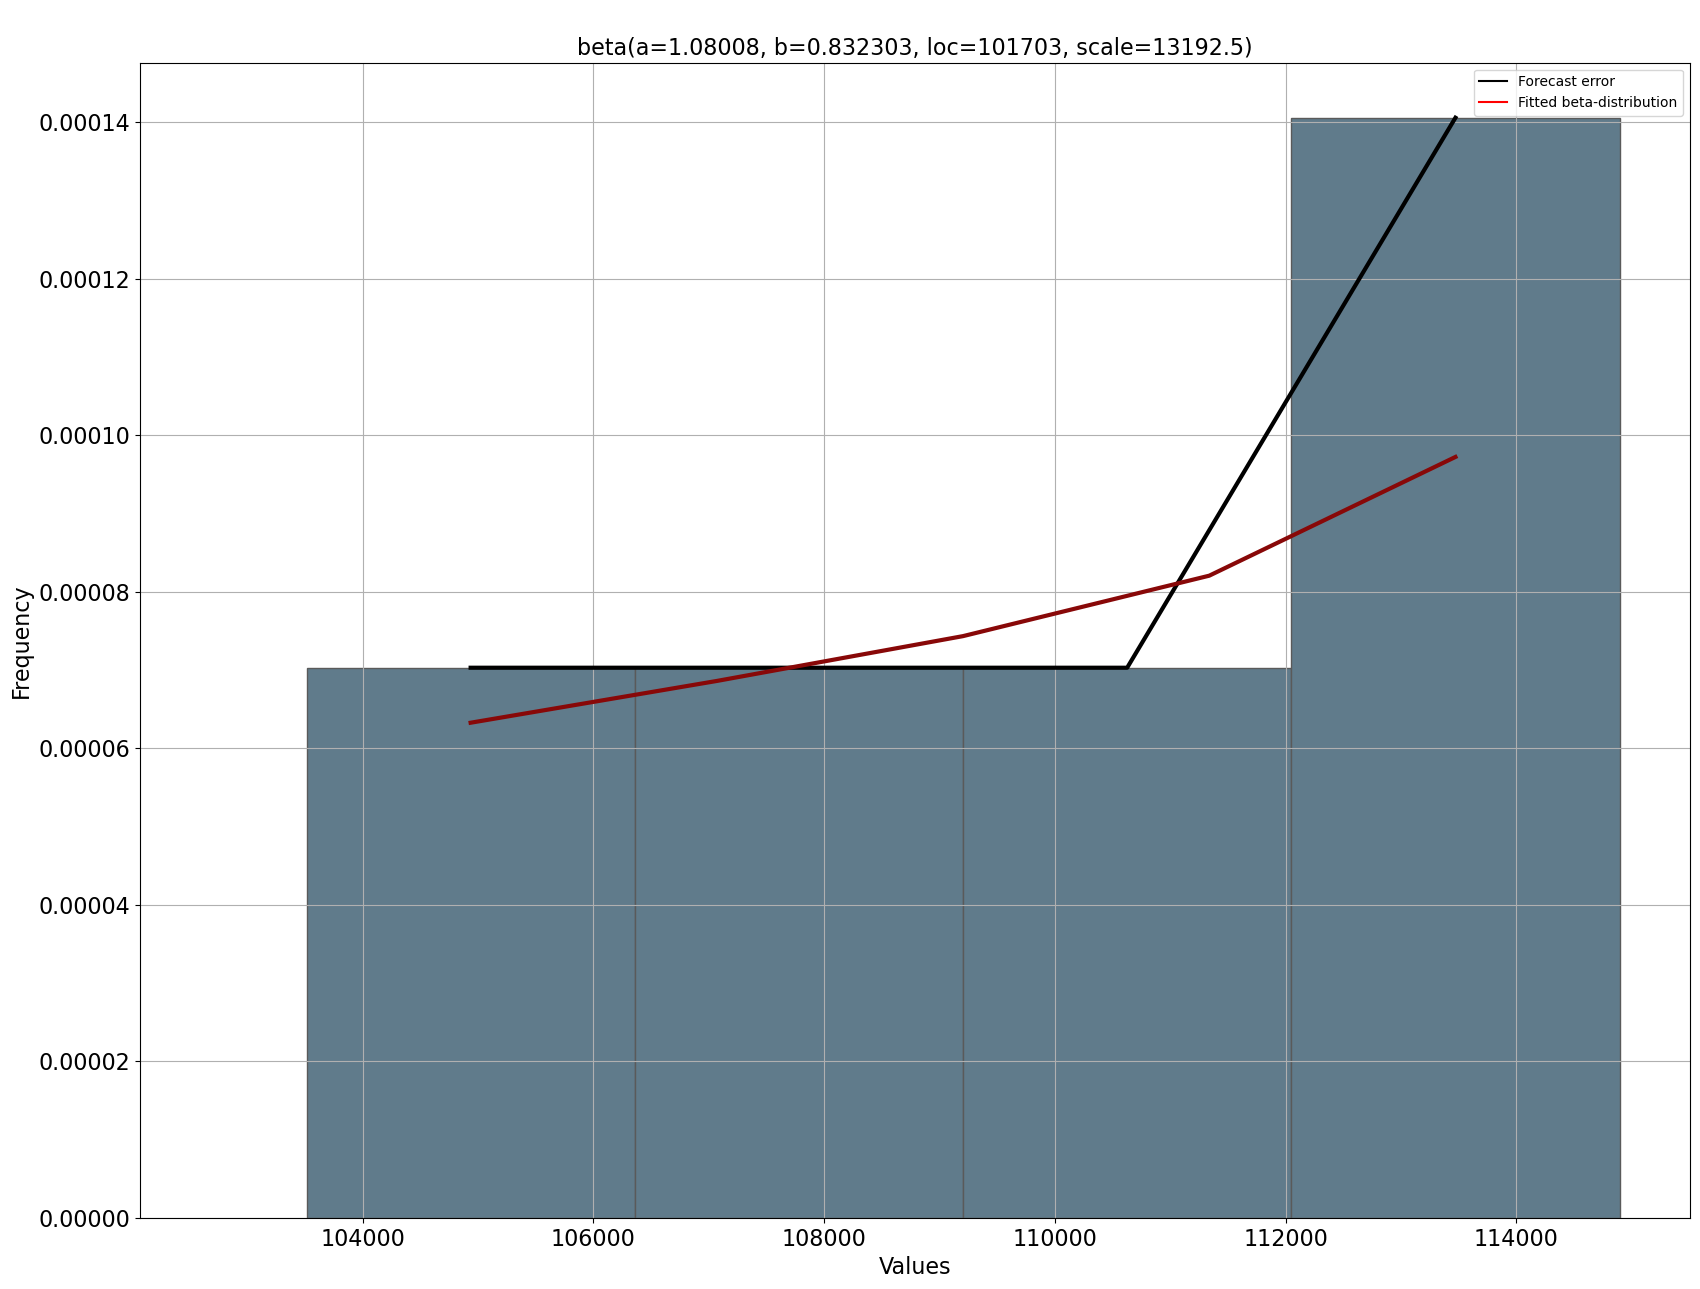

In [ ]:
# Find best theoretical distribution for empirical data X
dist_yearly = distfit()
dist_yearly.fit_transform(yearly_prod)
fig, ax = dist_yearly.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)